In [3]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LassoCV, LinearRegression

In [4]:
url = 'https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv'
df = pd.read_csv(url, sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


# Q1

Préciser le nombre de variables explicatives et le nombre d’observations.

In [5]:
num_dfX_cols = df.shape[1] - 1
dfX = df.drop(num_dfX_cols, axis=1)
dfX.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.937546,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,-0.714867,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853


In [6]:
dfY = df[num_dfX_cols]
dfY.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 210, dtype: float64

In [7]:
print("Nombre de variable explicatives:", dfX.shape[1])
print("Numbre d'observations", dfX.shape[0])

Nombre de variable explicatives: 210
Numbre d'observations 442


# Q2

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à
expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard
et la variable à expliquer

In [8]:
dfX.mean()

0      7.535450e-19
1     -1.507090e-17
2      5.494599e-20
3     -7.284269e-18
4      8.288995e-18
           ...     
205    5.525997e-18
206    3.265362e-17
207    1.507090e-17
208   -4.034606e-18
209    1.205672e-17
Length: 210, dtype: float64

In [9]:
dfX.var()

0      1.002268
1      1.002268
2      1.002268
3      1.002268
4      1.002268
         ...   
205    1.002268
206    1.002268
207    1.002268
208    1.002268
209    1.002268
Length: 210, dtype: float64

In [10]:
dfY.mean()

152.13348416289594

In [11]:
dfY.var()

5943.331347923785

Les variables explicatives sont centrés car ses moyennes proches de 0
le variable à expliquer est non centré

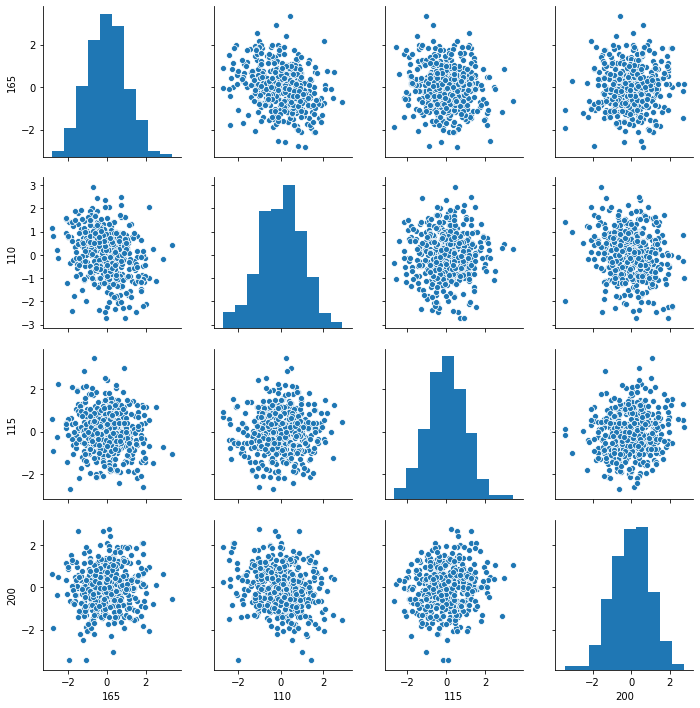

In [12]:
rand_cols = [np.random.randint(0,209) for i in range(4)]
sns_plot = sns.pairplot(dfX[rand_cols])

Les variables explicatives sont sparse.

# Q3

Echantillon d’apprentissage et de test.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.2, random_state=0)
print("X test shape:", X_test.shape)
print("X train shape:", X_train.shape)
print("Y test shape:", Y_test.shape)
print("Y train shape:", Y_train.shape)

X test shape: (89, 210)
X train shape: (353, 210)
Y test shape: (89,)
Y train shape: (353,)


# Q4

Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des
valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est
légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans
la suite.

In [14]:
X_train_cov = np.cov(X_train)

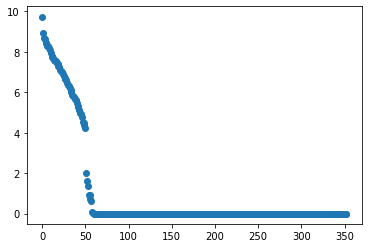

In [15]:
u,s,v = np.linalg.svd(X_train_cov)
plt.scatter(range(len(s)), s)

On constate qu'il y a seulement 60 des valeurs propres de la matrice de corrélation ne sont pas nulles.On gardera 60 variables dans
la suite.

# Q5

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS"
qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres
(associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept).
Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [16]:
pca = PCA(n_components=60)
Xpca=pca.fit_transform(X_train)
Model_PCA_before_OLS = LinearRegression(fit_intercept=True).fit(Xpca, Y_train)

Text(0.5, 1.0, 'Model_PCA_before_OLS')

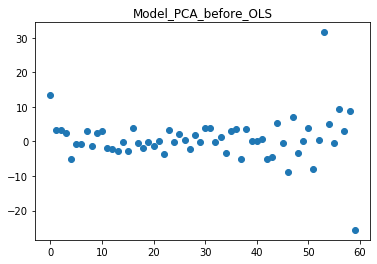

In [17]:
plt.scatter(range(Model_PCA_before_OLS.coef_.shape[0]),Model_PCA_before_OLS.coef_)
plt.title('Model_PCA_before_OLS')

In [18]:
Model_OLS = LinearRegression(fit_intercept=True).fit(X_train, Y_train)

Text(0.5, 1.0, 'Model_OLS')

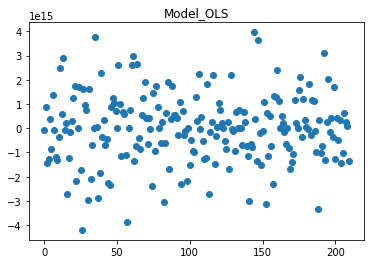

In [19]:
plt.scatter(range(Model_OLS.coef_.shape[0]),Model_OLS.coef_)
plt.title('Model_OLS')

# Q6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur
moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ?
Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP
(de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est
bien égal à la moyenne de Y sut le train.

In [20]:
print("Intercept OLS:", Model_OLS.intercept_)
print("Intercept PCA before OLS:", Model_PCA_before_OLS.intercept_)
print('Mean Y_train:',Y_train.mean())

Intercept OLS: 153.38748229461757
Intercept PCA before OLS: 151.60623229461757
Mean Y_train: 151.60623229461757


Intercept PCA before OLS est bien égale à la moyenne de Y_train. 

# Q7

Tracer les résidus de la prédiction sur
l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme).
Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction
sur l’échantillon test.

In [21]:
Y_pred_pca = Model_PCA_before_OLS.predict(pca.fit_transform(X_test))
res_pca = Y_test - Y_pred_pca

